## Model 1 - Linear Regression (Baseline model)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# df = pd.read_csv('pddummies2.csv')
df = pd.read_csv('clean_dataset2.csv')

In [3]:
df

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,MSRP,car_age,is_vintage,is_color_neutral
0,22590,2010,2,4,2,71229,0,2,0,8,1,46110,11,0,0
1,4500,1992,0,3,2,192000,0,0,0,0,1,25695,29,0,0
2,14000,2012,0,3,2,95000,0,0,1,5,1,37775,9,0,1
3,32990,2019,2,4,4,6897,0,2,0,8,1,38400,2,0,1
4,2100,2006,1,1,2,97000,0,0,0,4,1,21495,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120982,6977,2011,1,1,2,112396,0,0,0,9,50,24340,10,0,1
120983,4977,2005,1,1,2,154917,0,0,0,9,50,22560,16,0,0
120984,7977,2009,1,1,2,142868,0,0,0,9,50,19685,12,0,0
120985,7477,2012,2,1,2,64267,0,1,0,4,50,26595,9,0,0


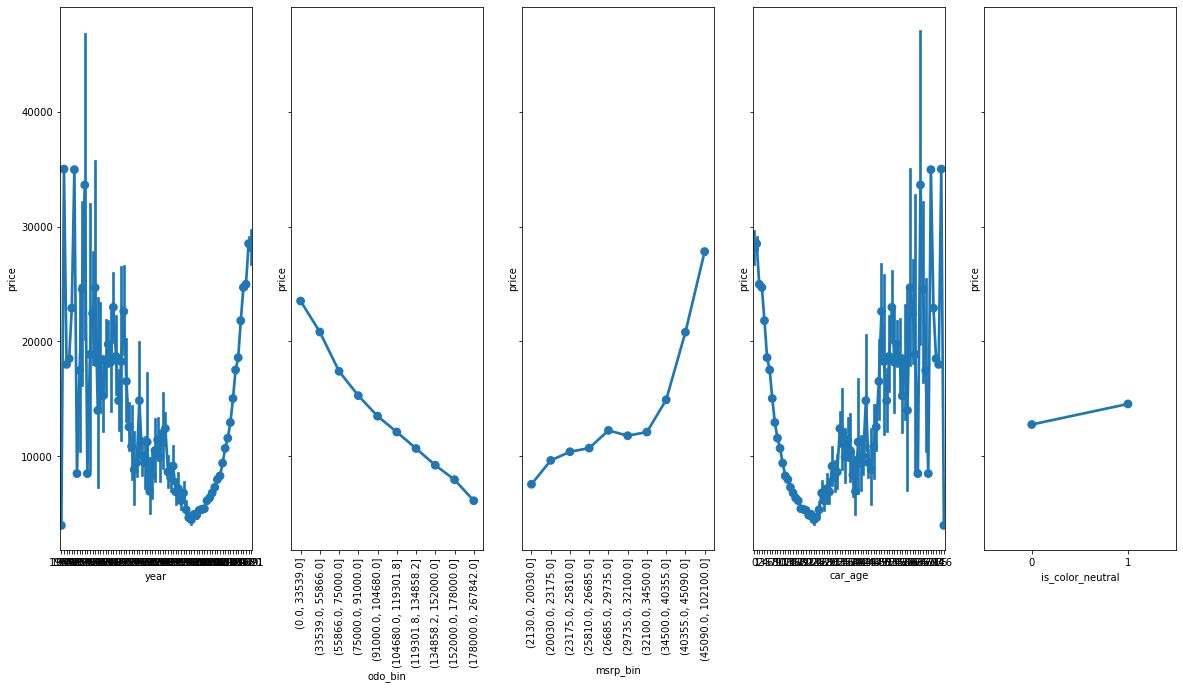

In [4]:
# Looking at correlation between car prices and some attributes
# Classifying odometer (mileage) and MSRP into 10% quantile bins for faster plotting
df['odo_bin'] = pd.cut(df['odometer'], [df['odometer'].quantile(x/10) for x in range(0,11)]) #, labels = [f'q{x}' for x in range(1,11)]
df['msrp_bin'] = pd.cut(df['MSRP'], [df['MSRP'].quantile(x/10) for x in range(0,11)]) #, labels = [f'q{x}' for x in range(1,11)]

fig, ax = plt.subplots(1,5, figsize = (20,10), sharey = True)
ax[1].tick_params(axis='x', labelrotation=90)
ax[2].tick_params(axis='x', labelrotation=90)

sns.pointplot(x='year', y='price', ax = ax[0], data=df.sort_values('year'))
sns.pointplot(x='odo_bin', y='price', ax = ax[1], data=df.sort_values('odometer'))
sns.pointplot(x='msrp_bin', y='price', ax = ax[2], data=df.sort_values('MSRP'))
sns.pointplot(x='car_age', y='price', ax = ax[3], data=df.sort_values('car_age'))
sns.pointplot(x='is_color_neutral', y='price', ax = ax[4], data=df)

df = df.drop(['odo_bin', 'msrp_bin'], axis = 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [7]:
# X, y = dflog.drop(['price'], axis = 1), dflog['price']
X, y = df.drop(['price'], axis = 1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X.dtypes

year                int64
condition           int64
cylinders           int64
fuel                int64
odometer            int64
title_status        int64
transmission        int64
drive               int64
type                int64
state               int64
MSRP                int64
car_age             int64
is_vintage          int64
is_color_neutral    int64
dtype: object

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Fitting linear regression 
linr = LinearRegression()
linr.fit(X_train, y_train)
y_pred = linr.predict(X_test)
print('r2 score:', linr.score(X_test, y_test))

# Mean Absolute Proportion Error
residual = y_test - y_pred
ape = np.abs(residual) / y_test
mape = np.mean(ape)
print(f"MAPE\t: {round(mape, 2)}")


#5. MAE
print("\n\t--- Mean Absolute Error (MAE) ---")
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f"MAE\t: {round(mae, 2)}")

# Return Accuracy
test_r2 = round(r2_score(y_pred=y_pred, y_true=y_test)*100, 2)
test_rmse = round(mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False), 2)
print(f"test RMSE\t: {round(test_rmse, 2)}")


y_train_pred = linr.predict(X_train)
test_r2 = round(r2_score(y_pred=y_train_pred, y_true=y_train)*100, 2)
test_rmse = round(mean_squared_error(y_pred=y_train_pred, y_true=y_train, squared=False), 2)
print(f"train RMSE\t: {round(test_rmse, 2)}")

r2 score: 0.6860705554327444
MAPE	: 0.49

	--- Mean Absolute Error (MAE) ---
MAE	: 3905.29
test RMSE	: 5272.66
train RMSE	: 5222.94


Due to low scores, we decide not to use linear regression as our model

In [11]:
# Feature coefficients
{k:v for k,v in zip(df.columns, linr.coef_)}

{'price': 284.94535453648973,
 'year': -248.99560479770346,
 'condition': 1533.2446691515868,
 'cylinders': -469.9964843455403,
 'fuel': -0.06084803346146229,
 'odometer': -804.9717331420828,
 'title_status': 1731.1854970051588,
 'transmission': -1163.0161519390467,
 'drive': -14.600183677904017,
 'type': -5.658833249326633,
 'state': 0.3744159231458619,
 'MSRP': -284.9453545365248,
 'car_age': 25220.178697829244,
 'is_vintage': 255.6979044435685}